#  <span style="color:red">Homework 01</span>

##  <span style="color:red">1.</span> Related with the nature of the data, which conditions should meet matrices $A$ and $b$ to be solvable from the least squares perspective.

+ It might happen that the columns of $A$ ar not linearly independent, so $A$ is not full rank. Then $A^{T}A$ is singular and the least squares $x$ are not uniquely defined. 

## <span style="color:red">2.</span> Use a least squares for non-linear models adjust the bitcoin price and perform a prediction using the model to determine the future daily price a week ahead, compare with the actual values.

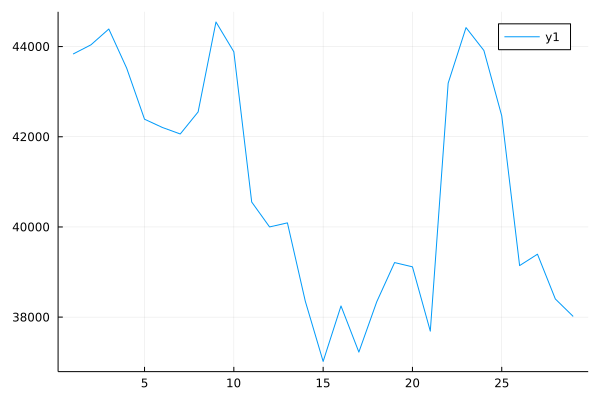

In [5]:
using CSV, Dates, Plots
using DataFrames
function addColumnFloatEnglish(data,field,newColumn)
    data[!,field] .= replace.(data[!,field], "," => "");
    data[!,newColumn] = parse.(Float64, data[!,field]);
    #data[!,"Date"] = replace.(data[!,"Date"], "." => "-");
    data[!,"Date"]=Date.(data[!,"Date"],Dates.DateFormat("u d, y"))
    data=select(data, Not([:Price,:Open,:High,:Low,:Vol,:Change]))
    return data
end
#using DataFramesMeta
#@chain dataBitcoin begin
#    @rsubset :Date > Date(2022,3,1)
#    @select(:Open ,:Low)
#end

dataBitcoin = CSV.read("Bitcoin.csv",DataFrame);
addColumnFloatEnglish(dataBitcoin,"Price","PriceFloat");
sort!(dataBitcoin, (:Date),rev = false)
plot(dataBitcoin.PriceFloat)

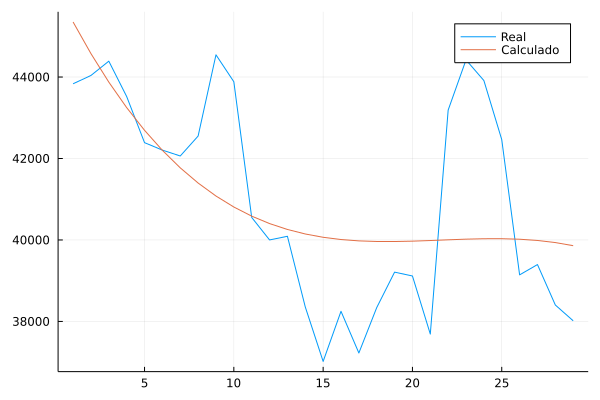

In [6]:
N = size(dataBitcoin.PriceFloat,1)
A = Array((1:N))
b = Array(dataBitcoin.PriceFloat)
A = [ones(N,1) A A.^2 A.^3]
p = A\b
pred = p[4]*A[:,4]+p[3]*A[:,3]+p[2]*A[:,2] + p[1]*ones(N,1)
plot(A[:,2],b, label = "Real")
plot!(A[:,2],pred,label = "Calculado")

## <span style="color:red">3.</span>  Use least squares to determine the relationship between the bitcoin price and prices of three comodities namely, oil, silver and gold, during the last year.

In [9]:
using CSV, Dates
using DataFrames
############################### Función para agregar columna de datos como Float64, establecer tipo fecha y eliminar información de dataframe
function addColumnFloat(data,field,newColumn)
    data[!,field] .= replace.(data[!,field], "." => "");
    data[!,field] .= replace.(data[!,field], "," => ".");
    data[!,newColumn] = parse.(Float64, data[!,field]);
    data[!,"Fecha"] = replace.(data[!,"Fecha"], "." => "-");
    data[!,"Fecha"]=Date.(data[!,"Fecha"],Dates.DateFormat("d-m-y"))
    data=select(data, Not([:Último,:Apertura,:Máximo,:Mínimo,:Vol,:var]))
    return data
end
##########################

arrayDF = ["BTC_USD","GOLD_USD","OIL_USD","SILVER_USD"]


dataBitcoin = CSV.read(arrayDF[1]*".csv",DataFrame)
dataGold = CSV.read(arrayDF[2]*".csv",DataFrame)
dataOil = CSV.read(arrayDF[3]*".csv",DataFrame)
dataSilver = CSV.read(arrayDF[4]*".csv",DataFrame)

dataBitcoin = addColumnFloat(dataBitcoin,"Último","BitCoin");
dataGold = addColumnFloat(dataGold,"Último","Gold");
dataOil = addColumnFloat(dataOil,"Último","Oil");
dataSilver = addColumnFloat(dataSilver,"Último","Silver")



,Fecha,Silver
,Date,Float64
1,2022-04-01,24.654
2,2022-03-31,25.133
3,2022-03-30,25.113
4,2022-03-29,24.736
5,2022-03-28,25.196
6,2022-03-27,25.672
7,2022-03-25,25.615
8,2022-03-24,25.92
9,2022-03-23,25.189


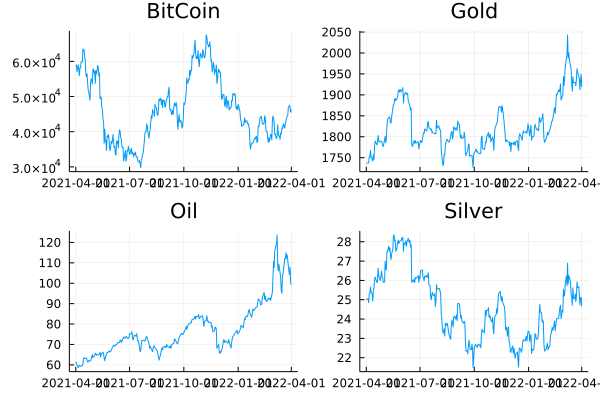

In [8]:
using Plots
p1 = plot(dataBitcoin.Fecha,dataBitcoin.BitCoin,title = "BitCoin");
p2 = plot(dataGold.Fecha,dataGold.Gold,title = "Gold");
p3 = plot(dataOil.Fecha,dataOil.Oil,title = "Oil");
p4 = plot(dataSilver.Fecha,dataSilver.Silver,title = "Silver");
plot(p1, p2, p3, p4, layout = (2,2), legend = false)


In [12]:
A = innerjoin(dataBitcoin,dataGold, on = :Fecha)
B = innerjoin(A,dataOil, on = :Fecha)
FinalData = innerjoin(B,dataSilver, on = :Fecha)
A = nothing
B = nothing
dataBitcoin =nothing
dataGold = nothing
dataOil = nothing
dataSilver = nothing
FinalData

,Fecha,BitCoin,Gold,Oil,Silver
,Date,Float64,Float64,Float64,Float64
1,2022-04-01,46297.0,1919.1,99.27,24.654
2,2022-03-31,45525.0,1949.2,100.28,25.133
3,2022-03-30,47075.0,1933.5,107.82,25.113
4,2022-03-29,47449.0,1912.2,104.24,24.736
5,2022-03-28,47105.0,1939.8,105.96,25.196
6,2022-03-25,44331.0,1954.2,113.9,25.615
7,2022-03-24,44013.0,1962.2,112.34,25.92
8,2022-03-23,42912.0,1937.3,114.93,25.189
9,2022-03-22,42373.0,1921.5,111.76,24.904


Debido a que se trata de explicar el precio del BitCoin con respecto a los valores de los precios de Comodities, la función objetivo $BTC = \beta_0+\beta_1*Gold + \beta_2*Oil+beta_3*Silver$

In [13]:
N = size(FinalData.BitCoin,1)
A = Array((1:N))
b = Array(FinalData.BitCoin)
A = [ones(N,1) FinalData.Gold FinalData.Oil FinalData.Silver]
p = A\b


4-element Vector{Float64}:
 145263.4412615262
    -48.926411792454665
     18.861308160242977
   -447.8544610019248

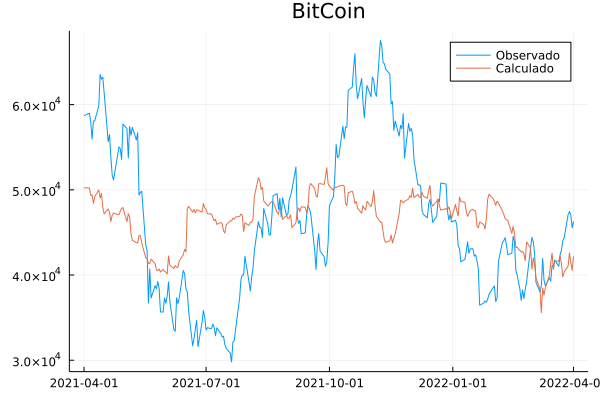

In [14]:
BitCoin = LinRange(minimum(FinalData.BitCoin),maximum(FinalData.BitCoin),100)
Gold = LinRange(minimum(FinalData.Gold),maximum(FinalData.Gold),100)
Oil = LinRange(minimum(FinalData.Oil),maximum(FinalData.Oil),100)
Silver = LinRange(minimum(FinalData.Silver),maximum(FinalData.Silver),100)

F = Array{Float64}(undef,100,100)
for i in 1:100
    F[i] = p[1]+p[2]*Gold[i] + p[3]*Oil[i] + p[4]*Silver[i]
end
#plotlyjs()
#surface(FinalData.Oil,FinalData.Silver, FinalData.Gold)

FinalData.Regr = p[1].+p[2].*FinalData.Gold .+ p[3].*FinalData.Oil + p[4].*FinalData.Silver

p1 = plot(FinalData.Fecha,FinalData.BitCoin,title = "BitCoin", label = "Observado")
p2 = plot!(FinalData.Fecha,FinalData.Regr, Label = "Calculado", label = "Calculado")
#plot(p1,p2,layout = (1,2))

## <span style="color:red">4.</span>  Solve the [point set registration problem](https://en.wikipedia.org/wiki/Point-set_registration). Hint (check: S. Umeyama, Least-Squares Estimation of Transformation Parameters Between Two Point Patterns, IEEE Trans. Pattern Anal. Mach. Intell., vol. 13, no. 4, 1991). Construct a GUI to test.

Aún no.